# **Import Libries **

In [ ]:
import pandas as pd
import numpy as np
#clean  my data set
import numpy as np
import nltk 
import re 
from nltk.corpus import stopwords
from collections import Counter

#plot

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# stem and lem 

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

#tock

from nltk.tokenize.treebank import TreebankWordDetokenizer

#COUNTER
from sklearn.feature_extraction.text import CountVectorizer
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

# **Get Data **

In [ ]:
!unzip '/content/drive/MyDrive/shai-training-2022-a-level-2.zip'

Archive:  /content/drive/MyDrive/shai-training-2022-a-level-2.zip
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: غ
error:  invalid response [غ]
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test.csv                
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train.csv               
replace Valid.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Valid.csv               
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   


In [ ]:
data =pd.read_csv("/content/Train.csv") #create a data frame 
valid=pd.read_csv("/content/Valid.csv")
testd=pd.read_csv("/content/Test.csv")
#submit=pd.read_csv("/content/sample_submission.csv")

In [ ]:
print("Training data set : \n")
print(data.head(2))

print("the validation data set : \n")
print(valid.head(2))

print("Testing data set : \n")
print(testd.head(2))

Training data set : 

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
the validation data set : 

                                                text  label
0  It's been about 14 years since Sharon Stone aw...      0
1  someone needed to make a car payment... this i...      0
Testing data set : 

   id                                               text  label
0   0  I always wrote this series off as being a comp...    NaN
1   1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...    NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
testd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5000 non-null   int64  
 1   text    5000 non-null   object 
 2   label   0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.3+ KB


In [ ]:
data['label'].unique()

array([0, 1])

# **EDA**

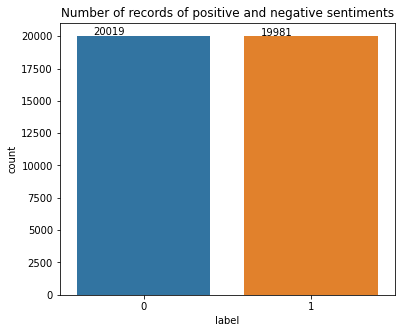

In [ ]:
#we create a count plot to compare the number of positive and negative sentiments.
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'label', data=data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

# **Clean**

In [ ]:
stop_words = stopwords.words("english")
def remove_stop_words(text) :
    return " ".join([word for word in text.split(" ") if word not in stop_words])


hashtag_re = re.compile(pattern="#[\w\d]+")

def remove_hashtag(text: str) -> str:
    return hashtag_re.sub(repl="", string=text)
                          

mention_re = re.compile("@\w+")
def remove_mention(text):
    return mention_re.sub(repl="", string=text)

punc_re = re.compile(r"""[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""")
def remove_punctation(text: str) -> str:
    # TODO: Look for a suitable way to remove punctiation marks from a text
    # TIP: Look for a regex expression
    return punc_re.sub(repl="", string=text)   

def remove_urls(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

numbers_re = re.compile("\d+")
def remove_numbers(text):
    # TODO: Implement remove numbers
    return numbers_re.sub(repl="", string=text)

multiple_space_re = re.compile("\s{2,}")
def remove_multiple_whitespace(text):
    return multiple_space_re.sub(repl=" ", string=text)


In [ ]:
def clean_all(text):
    text = remove_urls(text)
    text = remove_hashtag(text)
    text = remove_mention(text)
    text = remove_punctation(text)
    text = remove_numbers(text)
    text = remove_stop_words(text)
    text = remove_multiple_whitespace(text)
    text = text.lower().strip() #normlization 
    
    
    return text

In [ ]:
data["clean_text"] = data["text"].apply(clean_all)
valid["clean_text"] = valid["text"].apply(clean_all)
testd["clean_text"] = testd["text"].apply(clean_all)

In [ ]:
data.head(5)

,text,label,clean_text,cleantok_text,clean_stem,clean_lemmatize,Stemming,lemmatization,X_encoded
0,I grew up (b. 1965) watching and loving the Th...,0,i grew b watching loving thunderbirds all mate...,"[i, grew, b, watching, loving, thunderbirds, a...","[i, grew, b, watch, love, thunderbird, all, ma...","[i, grew, b, watching, loving, thunderbird, al...",i grew b watch love thunderbird all mate schoo...,i grew b watching loving thunderbird all mate ...,"[1, 1962, 918, 16, 30, 6173, 238, 2476, 341, 1..."
1,"When I put this movie in my DVD player, and sa...",0,when i put movie dvd player sat coke chips i e...,"[when, i, put, movie, dvd, player, sat, coke, ...","[when, i, put, movi, dvd, player, sat, coke, c...","[when, i, put, movie, dvd, player, sat, coke, ...",when i put movi dvd player sat coke chip i exp...,when i put movie dvd player sat coke chip i ex...,"[216, 1, 155, 3, 215, 996, 1628, 5490, 4305, 1..."
2,Why do people who do not know what a particula...,0,why people know particular time past like feel...,"[why, people, know, particular, time, past, li...","[whi, peopl, know, particular, time, past, lik...","[why, people, know, particular, time, past, li...",whi peopl know particular time past like feel ...,why people know particular time past like feel...,"[427, 27, 44, 792, 9, 477, 7, 75, 140, 60, 204..."
3,Even though I have great interest in Biblical ...,0,even though i great interest biblical movies i...,"[even, though, i, great, interest, biblical, m...","[even, though, i, great, interest, biblic, mov...","[even, though, i, great, interest, biblical, m...",even though i great interest biblic movi i bor...,even though i great interest biblical movie i ...,"[17, 89, 1, 29, 83, 4687, 3, 1, 210, 266, 100,..."
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...,"[im, die, hard, dads, army, fan, nothing, ever...","[im, die, hard, dad, armi, fan, noth, ever, ch...","[im, die, hard, dad, army, fan, nothing, ever,...",im die hard dad armi fan noth ever chang i got...,im die hard dad army fan nothing ever change i...,"[82, 285, 217, 1178, 1114, 136, 95, 66, 276, 1..."


In [ ]:
valid.head()

,text,label,clean_text,cleantok_text,clean_stem,clean_lemmatize,Stemming,lemmatization
0,It's been about 14 years since Sharon Stone aw...,0,its years since sharon stone awarded viewers l...,"[its, years, since, sharon, stone, awarded, vi...","[it, year, sinc, sharon, stone, award, viewer,...","[it, year, since, sharon, stone, awarded, view...",it year sinc sharon stone award viewer legcros...,it year since sharon stone awarded viewer legc...
1,someone needed to make a car payment... this i...,0,someone needed make car payment truly awful ma...,"[someone, needed, make, car, payment, truly, a...","[someon, need, make, car, payment, truli, aw, ...","[someone, needed, make, car, payment, truly, a...",someon need make car payment truli aw make jea...,someone needed make car payment truly awful ma...
2,The Guidelines state that a comment must conta...,0,the guidelines state comment must contain mini...,"[the, guidelines, state, comment, must, contai...","[the, guidelin, state, comment, must, contain,...","[the, guideline, state, comment, must, contain...",the guidelin state comment must contain minimu...,the guideline state comment must contain minim...
3,This movie is a muddled mish-mash of clichés f...,0,this movie muddled mishmash clichés recent cin...,"[this, movie, muddled, mishmash, clichés, rece...","[thi, movi, muddl, mishmash, cliché, recent, c...","[this, movie, muddled, mishmash, clichés, rece...",thi movi muddl mishmash cliché recent cinema t...,this movie muddled mishmash clichés recent cin...
4,Before Stan Laurel became the smaller half of ...,0,before stan laurel became smaller half alltime...,"[before, stan, laurel, became, smaller, half, ...","[befor, stan, laurel, becam, smaller, half, al...","[before, stan, laurel, became, smaller, half, ...",befor stan laurel becam smaller half alltim gr...,before stan laurel became smaller half alltime...


# **Stemming and Lemmatization**

In [ ]:
#tokenize the sentinces 

def tokenize(text):
  tokens = nltk.word_tokenize(text)
  return tokens

data["cleantok_text"] = data["clean_text"].apply(tokenize)  
testd["cleantok_text"]=testd["clean_text"].apply(tokenize) 
valid["cleantok_text"]=valid["clean_text"].apply(tokenize)

In [ ]:
#stemming
ps=PorterStemmer()
def stemming(toknized_text):
  text=[ps.stem(word) for word in toknized_text] 
  return text 
df=data
df["clean_stem"]=df["cleantok_text"].apply(stemming)
testd["clean_stem"]=testd["cleantok_text"].apply(stemming)
valid["clean_stem"]=valid["cleantok_text"].apply(stemming)

In [ ]:
#lemm

wn=WordNetLemmatizer()
def lemmatizing(toknized_text):
  text=[wn.lemmatize(word) for word in toknized_text]
  return text 

df["clean_lemmatize"]=df["cleantok_text"].apply(lemmatizing)
testd["clean_lemmatize"]=testd["cleantok_text"].apply(lemmatizing)
valid["clean_lemmatize"]=valid["cleantok_text"].apply(lemmatizing)

In [ ]:
# convert stem and lem to sentinces 


x=[]
z=[]
for i in df['clean_stem']:
  y=TreebankWordDetokenizer().detokenize(i)
  x.append(y)
for i in df['clean_lemmatize']:
  y=TreebankWordDetokenizer().detokenize(i)
  z.append(y)  

df["Stemming"]=x
df["lemmatization"]=z


t=[]
w=[]
for i in testd['clean_stem']:
  y=TreebankWordDetokenizer().detokenize(i)
  t.append(y)
for i in testd['clean_lemmatize']:
  y=TreebankWordDetokenizer().detokenize(i)
  w.append(y)  

testd["Stemming"]=t
testd["lemmatization"]=w


a=[]
b=[]
for i in valid['clean_stem']:
  y=TreebankWordDetokenizer().detokenize(i)
  a.append(y)
for i in valid['clean_lemmatize']:
  y=TreebankWordDetokenizer().detokenize(i)
  b.append(y)  

valid["Stemming"]=a
valid["lemmatization"]=b

In [ ]:
#shapes
print(df.shape)
print(testd.shape)
print(valid.shape)

(40000, 8)
(5000, 9)
(5000, 8)


# **Prepare data to model **

In [ ]:
#convert each array of words  to list 
xtrain=df["clean_stem"]
xtrain.tolist()

xtest=testd["clean_stem"]
xtest.tolist()

xvalid=valid["clean_stem"]
xvalid.tolist()

[['it',
  'year',
  'sinc',
  'sharon',
  'stone',
  'award',
  'viewer',
  'legcross',
  'twist',
  'mani',
  'peopl',
  'mind',
  'and',
  'god',
  'know',
  'she',
  'game',
  'basic',
  'instinct',
  'sequel',
  'smashhit',
  'erotica',
  'basic',
  'instinct',
  'featur',
  'sexi',
  'stone',
  'vulner',
  'michael',
  'dougla',
  'howev',
  'fan',
  'origin',
  'might',
  'even',
  'get',
  'close',
  'one',
  'sinc',
  'instinct',
  'pain',
  'filmmak',
  'mediocr',
  'director',
  'michael',
  'catonjon',
  'assassin',
  'legaci',
  'first',
  'filmbr',
  'br',
  'the',
  'plot',
  'movi',
  'start',
  'car',
  'explos',
  'break',
  'right',
  'begin',
  'catherin',
  'tramel',
  'sharon',
  'stone',
  'tri',
  'look',
  'forc',
  'sexi',
  'suspect',
  'appear',
  'involv',
  'murder',
  'a',
  'psychiatrist',
  'horribl',
  'david',
  'morrisey',
  'appoint',
  'examin',
  'eventu',
  'fall',
  'intim',
  'game',
  'seductionbr',
  'br',
  'and',
  'without',
  'explan',
  '

In [ ]:
#convert each label to list 

ytrain=df["label"].tolist()
yvalid=valid["label"].tolist()


In [ ]:
#encode each uniqe word 

from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()                      
word_tokenizer.fit_on_texts(xtrain)                  
X_encoded = word_tokenizer.texts_to_sequences(xtrain) 
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(xtrain)

#for testing data set 
word_tokenizer.fit_on_texts(xtest)                  
X_encoded_test = word_tokenizer.texts_to_sequences(xtest) 
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(xtest)


#for validation 
word_tokenizer.fit_on_texts(xvalid)                  
X_encoded_valid = word_tokenizer.texts_to_sequences(xvalid) 
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(xvalid)



In [ ]:
len(word_tokenizer.word_index)

138303

In [ ]:
print("Length of the first sentence: ",len(X_encoded[0])) 
print("Length of the second sentence: ",len(X_encoded[9])) 

print("Length of the first sentence: ",len(X_encoded_test[0])) 
print("Length of the second sentence: ",len(X_encoded_test[9]))

print("Length of the first sentence: ",len(X_encoded_valid[0])) 
print("Length of the second sentence: ",len(X_encoded_valid[9]))

Length of the first sentence:  97
Length of the second sentence:  154
Length of the first sentence:  219
Length of the second sentence:  99
Length of the first sentence:  220
Length of the second sentence:  87


In [ ]:
decodeddf=df
decodeddf['X_encoded']=X_encoded
v=decodeddf['X_encoded'].apply(len)
v.max()



1501

In [ ]:
#padding 

from keras_preprocessing.sequence import pad_sequences
X_pad = pad_sequences(X_encoded, maxlen=1501, padding="post", truncating="post")

X_pad_test=pad_sequences(X_encoded_test, maxlen=1501, padding="post", truncating="post")

X_pad_valid=pad_sequences(X_encoded_valid, maxlen=1501, padding="post", truncating="post")

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN

In [ ]:

    # A simpleRNN without any pretrained embeddings and one dense layer
#model = Sequential()
#model.add(Embedding(len(word_tokenizer.word_index) + 1,300,input_length=1501))
#model.add(SimpleRNN(100))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1501, 300)         48974700  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               40100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 49,014,901
Trainable params: 49,014,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_padded = np.array(X_pad)
training_labels = np.array(ytrain)
testing_padded = np.array(X_pad_valid)
testing_labels = np.array(yvalid)

In [ ]:
#model.fit(training_padded, training_labels,epochs=5, batch_size=512)

Epoch 1/5
79/79 [==============================] - 842s 10s/step - loss: 0.6963 - accuracy: 0.5034
Epoch 2/5
79/79 [==============================] - 732s 9s/step - loss: 0.6953 - accuracy: 0.5031
Epoch 3/5
79/79 [==============================] - 719s 9s/step - loss: 0.6934 - accuracy: 0.5038
Epoch 4/5
79/79 [==============================] - 744s 9s/step - loss: 0.6934 - accuracy: 0.5041
Epoch 5/5
79/79 [==============================] - 764s 10s/step - loss: 0.6936 - accuracy: 0.5027


In [ ]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Auc: %.2f%%" % (roc_auc(scores,yvalid)))

Auc: 0.50%


In [ ]:
#q=model.predict(X_pad_test)

157/157 [==============================] - 35s 223ms/step


In [ ]:
#q = model.predict(X_pad_test, verbose=1)


157/157 [==============================] - 32s 201ms/step


In [ ]:
submit["label"]=q
submot = pd.DataFrame(submit)
from google.colab import files
submot.to_csv('sub21.csv', encoding = 'utf-8-sig', index=False,header = 1) 
files.download('sub21.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB_model = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
MultinomialNB_model.fit(training_padded,training_labels)

y_pred = MultinomialNB_model.predict(testing_padded)

from sklearn.metrics import classification_report

print(classification_report(testing_labels, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.85      0.63      2486
           1       0.53      0.17      0.26      2514

    accuracy                           0.51      5000
   macro avg       0.52      0.51      0.45      5000
weighted avg       0.52      0.51      0.44      5000



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
logreg = Pipeline([
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', LogisticRegression()),
 ])
logreg.fit(training_padded,training_labels)

from sklearn.metrics import classification_report
y_pred = logreg.predict(testing_padded)

print(classification_report(testing_labels, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      2486
           1       0.52      0.52      0.52      2514

    accuracy                           0.52      5000
   macro avg       0.52      0.52      0.52      5000
weighted avg       0.52      0.52      0.52      5000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred = logreg.predict(X_pad_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
submit["label"]=y_pred
submot = pd.DataFrame(submit)
from google.colab import files
submot.to_csv('sub21.csv', encoding = 'utf-8-sig', index=False,header = 1) 
files.download('sub21.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(training_padded,training_labels)

test_predict = dt.predict(testing_padded)

print(classification_report(testing_labels, test_predict))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48      2486
           1       0.50      0.53      0.51      2514

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, ytrain, test_size=0.2, random_state=110)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

#on stemming 
nb = MultinomialNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.84      0.63      3985
           1       0.53      0.18      0.26      4015

    accuracy                           0.51      8000
   macro avg       0.52      0.51      0.45      8000
weighted avg       0.52      0.51      0.45      8000



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
logreg = Pipeline([
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', LogisticRegression()),
 ])
logreg.fit(X_train,y_train)

from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      3985
           1       0.53      0.50      0.51      4015

    accuracy                           0.52      8000
   macro avg       0.52      0.52      0.52      8000
weighted avg       0.52      0.52      0.52      8000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train,y_train)

test_predict = knn.predict(X_test)

print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50      3985
           1       0.50      0.48      0.49      4015

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000

